# **Classification of Satellite Images Using Deep Learning**

**Author:** Jann Rovic Cueto<br>
**School**: Rizal Technological University

* This is a jupyter notebook created during the Design and Artificial Intelligence Winterfall Exchange Student Program 2023.

* To know more about k-train information, please see: https://github.com/amaiya/ktrain

## Objective
- Create a CNN model from satellite images taken from planet Satellite Imagery Website: https://www.planet.com/
- Analyze the results of the model and make theoretical assumptions about the model's performance.


## Key Steps

* Test the different model architecture
* Specift the best model fit
* Adjust the hyperparameter depending on the model performance
* Test the model


##**Model Visualization Rule of Thumb**

**Underfitting:** This occurs when a model is too simple to capture the underlying structure of the data. It performs poorly not only on the training data but also on new, unseen data. In the context of CNNs, it might mean the model is not complex enough to understand the patterns in the image data.

**Overfitting:** This happens when a model learns the detail and noise in the training data to the extent that it negatively impacts its performance on new data. Essentially, the model memorizes the training data instead of learning the underlying patterns. In CNNs, overfitting might occur when the model is too complex relative to the amount and variability of the training data.

**Balanced:** A balanced model achieves a good trade-off between underfitting and overfitting. It generalizes well to new, unseen data by capturing the underlying patterns without memorizing the noise in the training data. In CNNs, a balanced model would appropriately capture the features in the images without being overly simplistic or overly complex.

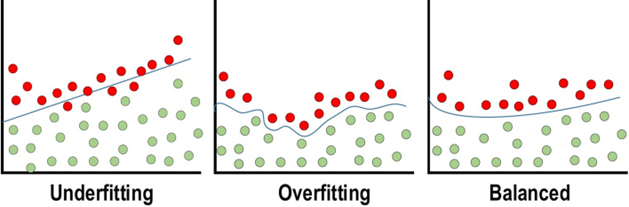



In [3]:
# Connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ktrain Library
!pip install ktrain

In [5]:
# Data Visualization and Model Training
import ktrain
from ktrain import vision as vis
import os
import matplotlib.pyplot as plt
import random

# Magic function that will make your plot outputs appear and be stored within the notebook
%matplotlib inline

# Function used to to render higher resolution images
%config InlineBackend.figure_format = 'retina'

#**I. Load the Datasets**
##How to copy the path of the drive folder see attached image


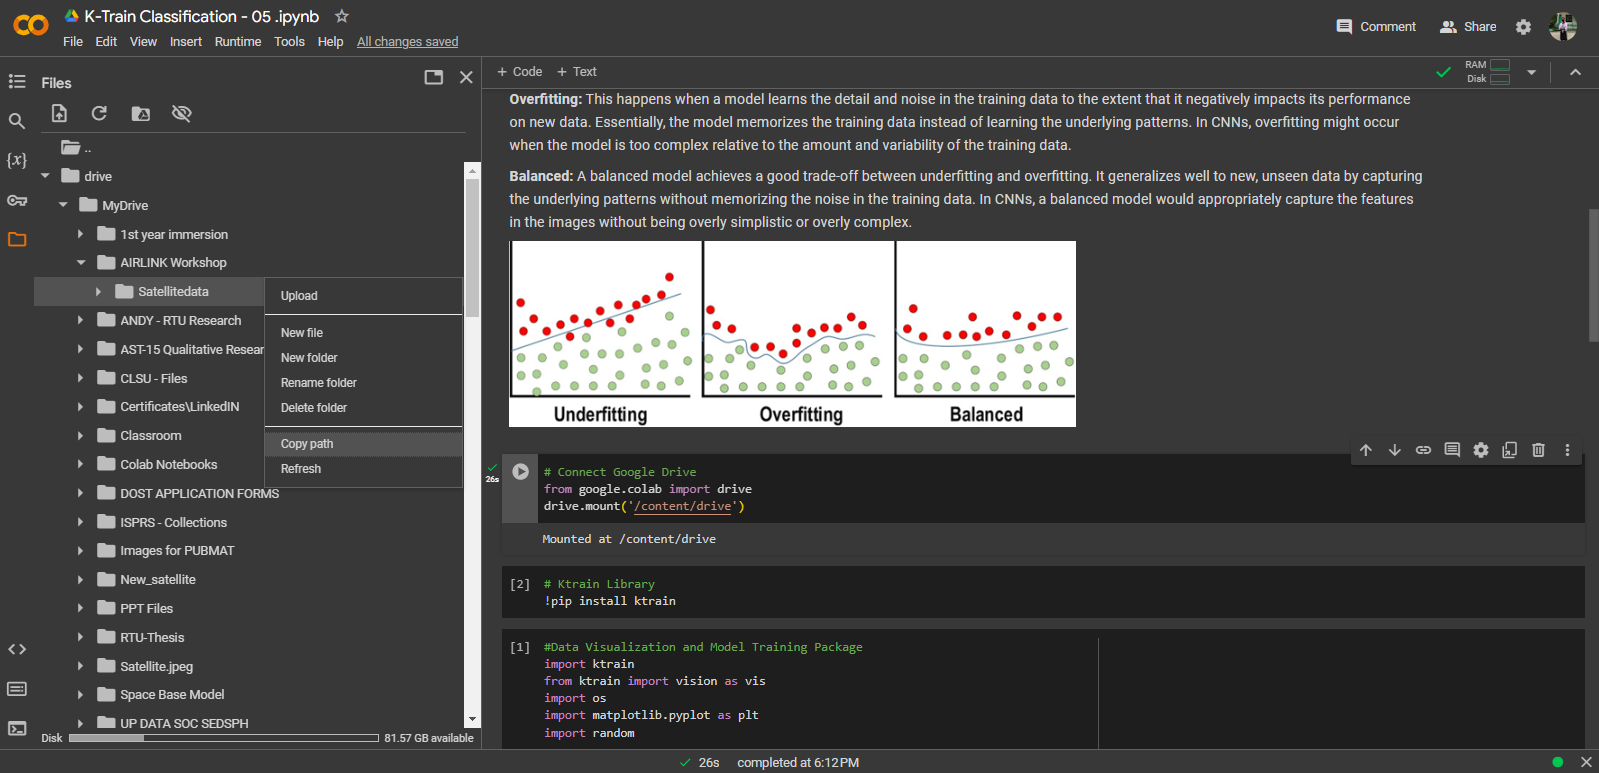

In [6]:
input_satellite_image = '/content/drive/MyDrive/AIRLINK Workshop/Satellitedata'

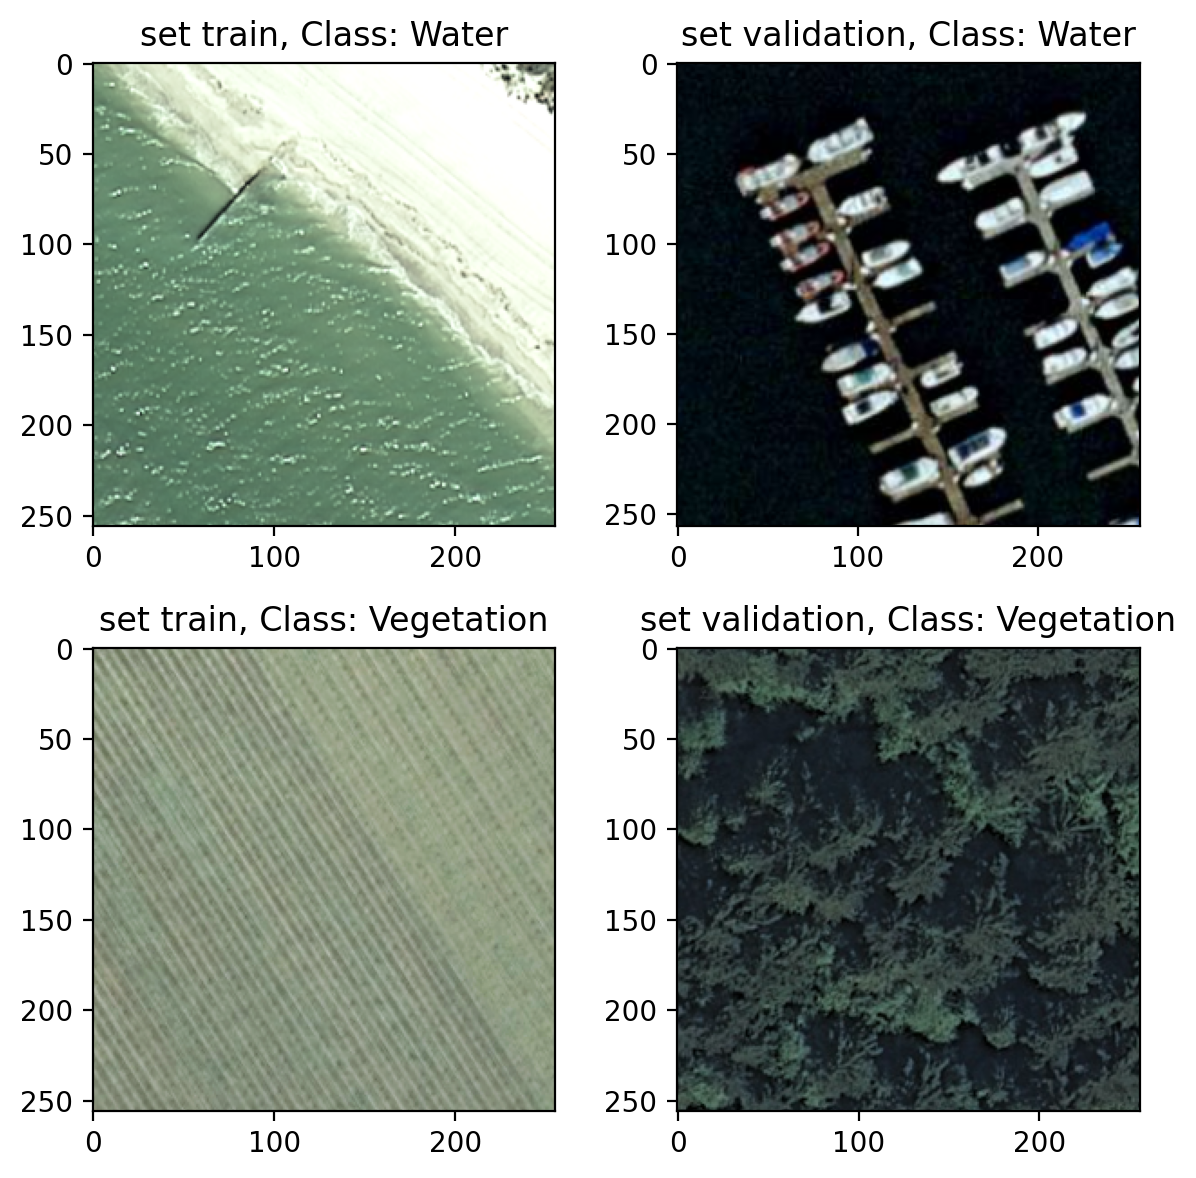

In [12]:
# Check the datasets
# In this part it is important that you already know the correct name of each folder in you drive.

fig, ax = plt.subplots(2, 2, figsize=(6, 6))  # Adjust as needed
ax = ax.ravel()  # Flatten the axes array


for i, _set in enumerate(['train', 'validation']):
    set_path = os.path.join(input_satellite_image, _set)  # Use os.path.join for correct path construction

    # Randomly select an image from 'Water' and 'Vegetation' folders
    water_images = os.listdir(os.path.join(set_path, 'water'))
    vegetation_images = os.listdir(os.path.join(set_path, 'vegetation'))

    water_image_path = os.path.join(set_path, 'water', random.choice(water_images))
    vegetation_image_path = os.path.join(set_path, 'vegetation', random.choice(vegetation_images))

    ax[i].imshow(plt.imread(water_image_path))  # Use plt.imread to read images
    ax[i].set_title(f'set {_set}, Class: Water')

    ax[i + 2].imshow(plt.imread(vegetation_image_path))
    ax[i + 2].set_title(f'set {_set}, Class: Vegetation')

plt.tight_layout() # This make the image plot tight together

plt.show()

##**II. Pre-processing**

* The minimum range of image size the model can handle are range to 244x 244 or 128x 128.
* It will plot the length of the images available in the folder. If you use the data augmentation the result will be multiply by two.

In [13]:
(train_data, test_data, preproc) = vis.images_from_folder(datadir= input_satellite_image,
                                                          #use a default data augmenetasi with horizontal_flip=true
                                                          #data_aug=vis.get_data_aug(horizontal_flip=True),
                                                          #data_aug = vis.get_data_aug(rotation_range=45),
                                                          train_test_names=['train','validation'],
                                                          target_size=(244,244),color_mode='rgb') # original dimensions of the images are 256 x 256

Found 120 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [14]:
# Get the classes names which is the name of the subfolder containing the images.
preproc.get_classes()

['vegetation', 'water']

In [15]:
# List of the different CNN Architectures available in Ktrain library.
vis.print_image_classifiers()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized) [https://arxiv.org/abs/1512.03385]
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized) [https://arxiv.org/abs/1704.04861]
pretrained_mobilenetv3: MobileNetV3-Small Neural Network (pretrained on ImageNet)
mobilenetv3: MobileNetV3-Small Neural Network (randomly initialized) [https://arxiv.org/abs/1905.02244]
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized) [http://arxiv.org/abs/1512.00567]
pretrained_efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet)
efficientnetb1: EfficientNet-B1 Neural Network (pretrained on ImageNet) [https://arxiv.org/abs/1905.11946]
pretrained_efficientnetb7: EfficientNet-B7 Neural Network (pretrained on ImageNet)
efficientnetb7: EfficientNet-B7 Neural Network (pre

In [16]:
# Choose the model above and copy the paste the name, see example code below.
model = vis.image_classifier('resnet50', train_data, test_data) # try other model as much as possible.

Is Multi-Label? False
Is Regression? False
resnet50 model created.


#**III. Hyperparameter Setting**

In [17]:
# Batch size can be adjusted. Depends on the dataset. It also depends on the GPU memory of the computer also.
# In google colab the alloted maximum batch_size if you not subscribed is 16.
learner = ktrain.get_learner(model=model, train_data=train_data,val_data=test_data,
                             workers=8, use_multiprocessing=False, batch_size=8) # It can be 8, 16,32

In [ ]:
# Freezes the first 15 images this helps to minimize the overfitting if the model undergoes it. Use this only as needed.
# You can adjust the number of freeze you want.

learner.freeze(freeze_range=15)

**Epoch** refers to one complete pass through the entire training dataset. During each epoch, the model is trained on the entire dataset in batches

- Think of an epoch as a full cycle of your model's learning process. It's like going through all your study materials once before an exam. During each epoch, your model studies the entire training dataset, learns from it, adjusts its understanding, and improves its performance. Just as you might need to review your notes multiple times to fully understand a topic, your model might need to go through several epochs to grasp the patterns in the data and perform well on new tasks

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
15/15 [==============================] - 33s 2s/step - loss: 13.5753 - accuracy: 0.5083
Epoch 2/5
15/15 [==============================] - 31s 2s/step - loss: 9.7221 - accuracy: 0.5000
Epoch 3/5
15/15 [==============================] - 34s 2s/step - loss: 24.3235 - accuracy: 0.6083
Epoch 4/5
15/15 [==============================] - 10s 470ms/step - loss: 306.8983 - accuracy: 0.4250


/usr/local/lib/python3.10/dist-packages/ktrain/lroptimize/lrfinder.py:267: UserWarning: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.
  warnings.warn(str(e))




done.
Visually inspect loss plot and select learning rate associated with falling loss


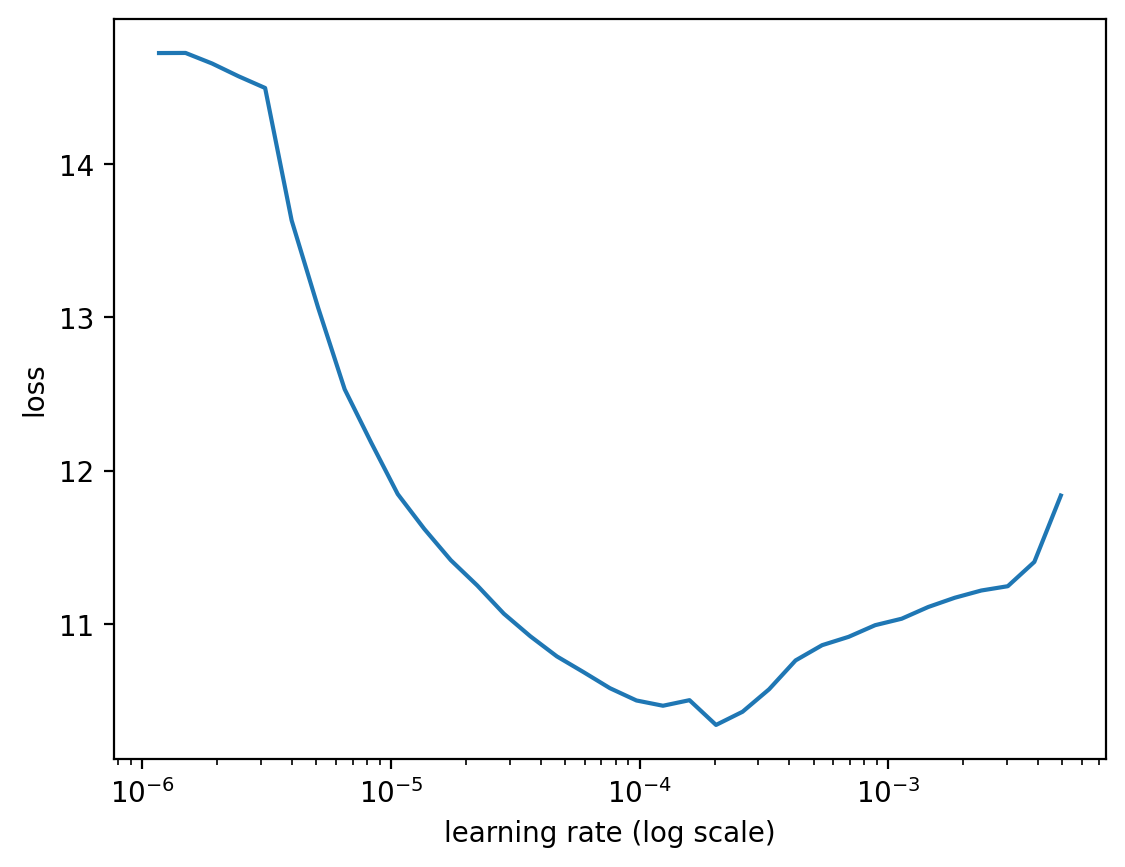

In [18]:
# Epoch
learner.lr_find(show_plot=True, max_epochs=5) # also this part can be adjusted.

In [ ]:
# Start of the Model Learning
# Learner autofit can be get on the lowest peak graph result above.
# This part takes time depends on the amount of data fed into the model.

learner.autofit(1e-4) #1e-1 change base on the learn curve.

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 0.0001...
Epoch 1/1024
15/15 [==============================] - 104s 7s/step - loss: 15.5246 - accuracy: 0.4583 - val_loss: 2.6662 - val_accuracy: 0.6500
Epoch 2/1024
15/15 [==============================] - 70s 5s/step - loss: 11.3073 - accuracy: 0.5167 - val_loss: 19.6610 - val_accuracy: 0.5000
Epoch 3/1024
15/15 [==============================] - ETA: 0s - loss: 12.9020 - accuracy: 0.5583

#**IV. Evaluating the Model Performance**

In [ ]:
loss, acc = learner.model.evaluate_generator(learner.val_data,
                                             steps=len(learner.val_data))

In [ ]:
# Plot the Metric Performance
learner.validate(class_names=preproc.get_classes())

In [ ]:
learner.plot ('loss')

In [ ]:
learner.plot ('accuracy')

In [ ]:
# Print the accuracy and error/loss of the model
loss, acc = learner.model.evaluate_generator(learner.val_data,
                                             steps=len(learner.val_data))
print('final loss:%s, final score:%s' % (loss, acc))

#**V. Test the Model**

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

In [ ]:
predictor.predict_filename('/content/drive/MyDrive/TaiwanYolo4/Test/Highway_508.jpg')



```
# End of the session. You can use the codes in your own datasets and build your own model. And make some research.
```

